In [1]:
import time
import matplotlib.pyplot as plt
import gym

# Method 1: Use local test class

In [3]:
import gym
from gym import spaces
class BasicEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(5)
        self.observation_space = spaces.Discrete(2)

    def step(self, action):

        # if we took an action, we were in state 1
        state = 1
    
        if action == 2:
            reward = 1
        else:
            reward = -1
            
        # regardless of the action, game is done after a single step
        done = True

        info = {}

        return state, reward, done, info

    def reset(self):
        state = 0
        return state
  
    def render(self, mode='human'):
        pass

    def close(self):
        pass

In [4]:
# method 1 - use local test class
env = BasicEnv()

We start at state = 0

In [5]:
env.reset()

0

and the agent can choose between 5 actions, numbered 0 to 4.

In [6]:
env.render("human")

In [7]:
action = env.action_space.sample()
print(action)

4


If they pick action = 2, they get a reward of 1, otherwise, the reward is -1. 

In [8]:
state, reward, done, info = env.step(1)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 -1 True {}
Reward = -1 with action = 4


If we pick action = 2, they get a reward of 1

We just reset the state

In [65]:
env.reset()

0

We can define the action by hand inside the step

In [9]:
action=2
state, reward, done, info = env.step(action)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 1 True {}
Reward = 1 with action = 2


otherwise

In [10]:
action=1
state, reward, done, info = env.step(action)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 -1 True {}
Reward = -1 with action = 1


Once we have lerned how to pass the actions inside the step we can test further enviroments 

In [68]:
import numpy as np
from gym import spaces
# same as BasicEnv, with one difference: the reward for each action is a normal variable
# purpose is to see if we can use libraries

class BasicEnv2(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = gym.spaces.Discrete(5)
        self.observation_space = gym.spaces.Discrete(2)

    def step(self, action):

        # if we took an action, we were in state 1
        state = 1
    
        reward = np.random.normal(loc = action, scale = action)
            
        # regardless of the action, game is done after a single step
        done = True

        info = {}

        return state, reward, done, info

    def reset(self):
        state = 0
        return state
  
    def render(self, mode='human'):
        pass

    def close(self):
        pass

In [69]:
# method 1 - use local test class
env = BasicEnv2()

In [70]:
env.reset()

0

In [71]:
env.render("human")

In [72]:
action = env.action_space.sample()

In [73]:
print(action)

2


In [74]:
state, reward, done, info = env.step(1)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 2.789265547053389 True {}
Reward = 2.789265547053389 with action = 2


# Method 2: Build from gym package

Once the Enviroment were created 
``` 
gym-basic/
  setup.py
  gym_basic/
    __init__.py
    envs/
      __init__.py
      basic_env.py
      basic_env_2.py
```

pip install -e gym-basic

In [11]:
import gym
# method 2 - build from gym package
env = gym.make("gym_basic:basic-v0")

In [12]:
env.reset()
env.render("human")
action = env.action_space.sample()
print(action)

0


In [13]:
state, reward, done, info = env.step(action)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 -1 True {}
Reward = -1 with action = 0


In [14]:
action=2
state, reward, done, info = env.step(action)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 1 True {}
Reward = 1 with action = 2


In [31]:
# method 1 - build from gym package
env = gym.make("gym_basic:basic-v2")

In [34]:
env.reset()
env.render("human")

In [35]:
action = env.action_space.sample()
print(action)

3


In [36]:
state, reward, done, info = env.step(1)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 3.311051392573194 True {}
Reward = 3.311051392573194 with action = 3


# Rendering - Part 1

The next step is load an image called 
**point_blue.png**, we just pointed the image at one fixed position.

We take the first enviroment **BasicEnv** and we modify as follows:

In [17]:
import gym
from gym import spaces

import numpy as np

import pygame
from pygame import display
from pygame.surfarray import array3d

# --- New code begin---
BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

#Load images
worker_image = pygame.image.load("point_blue.png")
#To the image we assing a kind of gym object
worker_rect = worker_image.get_rect()
# Moreover we add a position in the screen display
worker_rect.topleft = (25, 25) # .center, .topright

# --- New code end---  

class BasicEnv3(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(5)
        self.observation_space = spaces.Discrete(2)
        
        # --- New code begin---
        
        # We inizialize the display
        self.frame_size_x = 200
        self.frame_size_y = 200
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))        
        # --- New code end--- 

    def step(self, action):

        # if we took an action, we were in state 1
        state = 1
    
        if action == 2:
            reward = 1
        else:
            reward = -1
            
        # regardless of the action, game is done after a single step
        done = True

        info = {}
        
        
        # --- New code begin---        
        # We update the state with an image
        self.update_game_state()
        img = self.get_image_array_from_game()
        
        state=img
        # --- New code end---
        
        return state, reward, done, info
    
    
    def update_game_state(self):
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        #Blit assets ( we add the image to the game window)
        self.game_window.blit(worker_image, worker_rect)
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        state = 0
        return state
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        

    def close(self):
        pass

In [18]:
# method 1 - use local test class
env = BasicEnv3()
env.reset()
action = env.action_space.sample()
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))

4
Reward = -1 with action = 4


-1 True {}


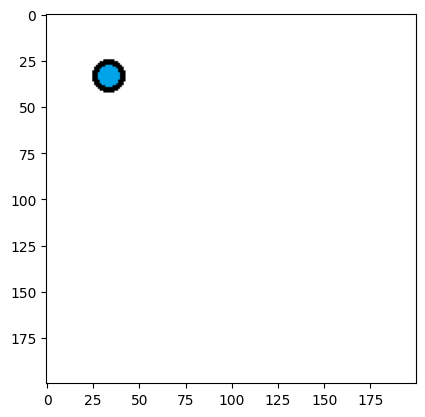

In [19]:
import matplotlib.pyplot as plt
print(reward, done, info)
plt.figure()
plt.imshow(state)

# Rendering - Part 2
We are interested now, to add an additional red point that will be the target 


In [20]:
import gym
from gym import spaces
import numpy as np

import pygame
from pygame import display
from pygame.surfarray import array3d
import random

BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

#Load images
worker_image = pygame.image.load("point_blue.png")
#To the image we assing a kind of gym object
worker_rect = worker_image.get_rect()
# Moreover we add a position in the screen display
worker_rect.topleft = (25, 25)

#Target image and position
position_coordinates=[(50,50),
                      (100,50),
                      (150,50)]
target_image = pygame.image.load("point_red.png")
target_rect = target_image.get_rect()
print('Initial position',100,100)
target_rect.center = (100, 100)

class BasicEnv4(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(5)
        self.observation_space = spaces.Discrete(2)
        
        # We inizialize the display
        self.frame_size_x = 200
        self.frame_size_y = 200
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))        
        # --- New code end--- 

    def step(self, action):

        # if we took an action, we were in state 1
        state = 1
    
        if action == 2:
            reward = 1
        else:
            reward = -1
            
        # regardless of the action, game is done after a single step
        done = True

        info = {}
         
              
        # We update the state with an image
        self.update_game_state()
        img = self.get_image_array_from_game()
        state=img
    
        
        return state, reward, done, info
    
    
    def update_game_state(self):
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        #Blit assets ( we add the image to the game window)
        self.game_window.blit(worker_image, worker_rect)
        self.game_window.blit(target_image, target_rect)
        
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        
        
        target_pos=random.choice(position_coordinates)
        print('Target position',target_pos[0], target_pos[1])
        target_rect.center = (target_pos[0], target_pos[1])


        state = 0
        return state
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        

    def close(self):
        pass

Initial position 100 100


Target position 150 50
1
Reward = -1 with action = 1
-1 True {}


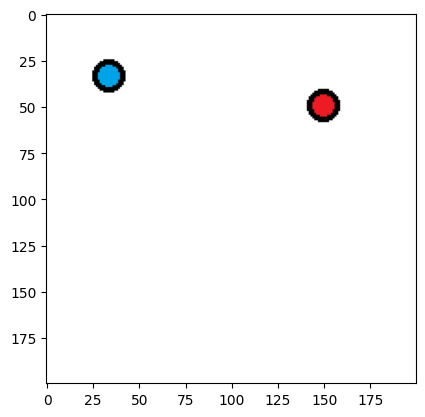

In [25]:
# method 1 - use local test class
env = BasicEnv4()
env.reset()
action = env.action_space.sample()
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))
import matplotlib.pyplot as plt
print(reward, done, info)
plt.figure()
plt.imshow(state)

# Action - Part 1
We are interested now to add the input to the enviroment, let add just the four keys, up, down, left, right

In [35]:
import gym
from gym import spaces
import numpy as np

import pygame
from pygame import display
from pygame.surfarray import array3d
import random

BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

#Load images
worker_image = pygame.image.load("point_blue.png")
#To the image we assing a kind of gym object
worker_rect = worker_image.get_rect()
worker_pos=[25,25]
# Moreover we add a position in the screen display
worker_rect.center = (worker_pos[0], worker_pos[1])

#Target image and position
position_coordinates=[(50,50),
                      (100,50),
                      (150,50)]

target_image = pygame.image.load("point_red.png")

class BasicEnv5(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(2)
        
        # We inizialize the display
        self.frame_size_x = 200
        self.frame_size_y = 200
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))   
        self.worker_pos=[25,25]
        
        #Load images
        self.worker_image = pygame.image.load("point_blue.png")
        #To the image we assing a kind of gym object
        self.worker_rect = worker_image.get_rect()
        self.worker_pos=[25,25]
        # Moreover we add a position in the screen display
        self.worker_rect.center = (worker_pos[0], worker_pos[1])
        
        self.target_image = pygame.image.load("point_red.png")
        self.target_rect = target_image.get_rect()
        print('Initial position',100,100)
        self.target_rect.center = (100, 100)
        
    def step(self, action):
        reward = 0
        self.worker_pos = self.move(action, self.worker_pos)
        if action != None:
            print(self.worker_pos)
        #reward = self.seat_handler()
        # regardless of the action, game is done after a single step
        done = True
        info = {}
        # We update the state with an image
        self.update_game_state()
        img = self.get_image_array_from_game()
        state=img
        return state, reward, done, info
    
    def worker_step(self,event):   
        '''
        Takes human keyboard event and then returns it as an action string
        '''
        action = None
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
        ################################################ 
        ########## CONVERT KEYPRESS TO DIRECTION ###### 
        ############################################## 
        elif event.type == pygame.KEYDOWN:
            
            if event.key == pygame.K_UP:
                action = 'UP'
            if event.key == pygame.K_DOWN:
                action = 'DOWN'
            if event.key == pygame.K_LEFT:
                action = 'LEFT'
            if event.key == pygame.K_RIGHT:
                action = 'RIGHT'
            # Esc -> Create event to quit the game
            if event.key == pygame.K_ESCAPE:
                pygame.event.post(pygame.event.Event(pygame.QUIT))                
        return action    
    
    def update_game_state(self):
        
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        print(self.worker_pos[0],self.worker_pos[1])
        self.worker_rect.x=self.worker_pos[0]
        self.worker_rect.y=self.worker_pos[1]
        
        #Draw rectangles to represent the rect's of each object
        pygame.draw.rect(self.game_window, (0, 255, 0), self.target_rect, 1)
        pygame.draw.rect(self.game_window, (255, 255, 0), self.worker_rect, 1)
        
        #Blit assets
        self.game_window.blit(target_image, self.target_rect)
        self.game_window.blit(worker_image, self.worker_rect)
        
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        target_pos=random.choice(position_coordinates)
        print('Target position',target_pos[0], target_pos[1])
        self.target_rect.center = (target_pos[0], target_pos[1])
        state = 0
        return state
    
    def move(self,action,worker_pos):
        '''
        Changes direction based on action input.
        Updates Office_pos list to reflect direction change.
        '''
        if not action:
            return worker_pos
        if action == 'UP':
            worker_pos[1] -= 10
        if action == 'DOWN':
            worker_pos[1] += 10
        if action == 'LEFT':
            worker_pos[0] -= 10
        if action == 'RIGHT':
            worker_pos[0] += 10         
        return worker_pos    
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        
    def close(self):
        pass

Initial position 100 100
Target position 100 50
action_n 0
UP
[25, 15]
25 15
Reward = 0 with action = UP
0 True {}


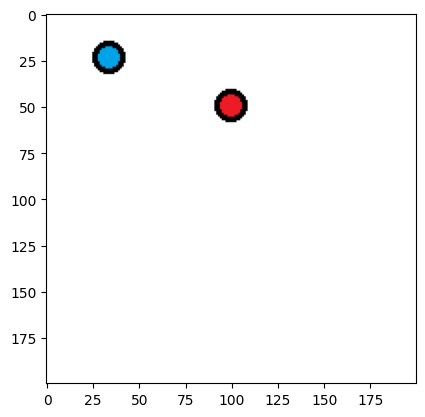

In [46]:
# method 1 - use local test class
env = BasicEnv5()
env.reset()
action_n = env.action_space.sample()
print('action_n',action_n)
action_key={
       0:'UP',
       1:'DOWN',
       2:'RIGHT',
       3:'LEFT'}
action=action_key[action_n]
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))
import matplotlib.pyplot as plt
print(reward, done, info)
plt.figure()
plt.imshow(state)

In [47]:
import sys
env = BasicEnv5()
# This is technically a FPS Refresh rate
FPS = 10
# FPS (frames per second) controller
fps_controller = pygame.time.Clock()
# Checks for errors encountered
check_errors = pygame.init()
# Initialise game window
pygame.display.set_caption('Testing Game') 
#The main game loop
running = True
while running:
    # Check Input from Human Step 
    for event in pygame.event.get():
        action = env.worker_step(event)    
        if event.type == pygame.QUIT:
            running = False
    state, reward, done, info = env.step(action)
    
    if action != None:
        print("Reward = {} with action = {}".format(reward,action))    
    
    '''
    # Check for move change based on action and Update worker Position
    worker_pos = env.move(env.action,env.worker_pos)
    print(worker_pos)
    #Draw the Screen
    env.game_window.fill(WHITE)

    #bg = pygame.image.load("background.png")
    #env.game_window.blit(bg, (0, 0))    
        
    worker_rect.x=worker_pos[0]
    worker_rect.y=worker_pos[1]
    # Draw desktop
    
    #Draw rectangles to represent the rect's of each object
    pygame.draw.rect(env.game_window, (0, 255, 0), target_rect, 1)
    pygame.draw.rect(env.game_window, (255, 255, 0), worker_rect, 1)
 
    #Blit assets
    env.game_window.blit(target_image, target_rect)
    env.game_window.blit(worker_image, worker_rect)
    '''

    # Check if we lost
    #env.game_over()
    #env.display_score(BLACK, 'consolas', 20)
    # Refresh game screen
    pygame.display.update()
    # Refresh rate
    fps_controller.tick(FPS)
    img = array3d(env.game_window)

Initial position 100 100
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
[35, 25]
35 25
Reward = 0 with action = RIGHT
[45, 25]
45 25
Reward = 0 with action = RIGHT
[55, 25]
55 25
Reward = 0 with action = RIGHT
[65, 25]
65 25
Reward = 0 with action = RIGHT
65 25
[75, 25]
75 25
Reward = 0 with action = RIGHT
75 25
75 25
75 25
75 25
75 25
[75, 35]
75 35
Reward = 0 with action = DOWN
[75, 45]
75 45
Reward = 0 with action = DOWN
75 45
75 45
75 45
75 45
75 45
[75, 55]
75 55
Reward = 0 with action = DOWN
75 55
75 55
[75, 65]
75 65
Reward = 0 with action = DOWN
75 65
[75, 75]
75 75
Reward = 0 with action = DOWN
75 75
75 75
[75, 85]
75 85
Reward = 0 with action = DOWN
75 85
[75, 95]
75 95
Reward = 0 with action = DOWN
75 95
[75, 105]
75 105
Reward = 0 with action = DOWN
75 105
[75, 115]
75 115
Reward = 0 with a

SystemExit: 

C:\Users\RMAGANAV\Anaconda3\envs\gym\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Action - Part 2
We are interested now to replace the keyboard input by the mouse 

In [19]:
import gym
from gym import spaces
import numpy as np

import pygame
from pygame import display
from pygame.surfarray import array3d
import random

BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

#Load images
worker_image = pygame.image.load("point_blue.png")
#To the image we assing a kind of gym object
worker_rect = worker_image.get_rect()
worker_pos=[25,25]
# Moreover we add a position in the screen display
worker_rect.center = (worker_pos[0], worker_pos[1])

#Target image and position
position_coordinates=[(50,50),
                      (100,50),
                      (150,50)]

target_image = pygame.image.load("point_red.png")

class BasicEnv6(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(1)
        self.observation_space = spaces.Discrete(2)
        
        # We inizialize the display
        self.frame_size_x = 200
        self.frame_size_y = 200
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))   
        self.worker_pos=[25,25]
        
        #Load images
        self.worker_image = pygame.image.load("point_blue.png")
        #To the image we assing a kind of gym object
        self.worker_rect = worker_image.get_rect()
        self.worker_pos=[25,25]
        # Moreover we add a position in the screen display
        self.worker_rect.center = (worker_pos[0], worker_pos[1])
        
        self.target_image = pygame.image.load("point_red.png")
        self.target_rect = target_image.get_rect()
        print('Initial position',100,100)
        self.target_rect.center = (100, 100)
        
    def step(self, action):
        reward = 0
        self.worker_pos = self.move(action, self.worker_pos)
        if action != None:
            print(self.worker_pos)
        #reward = self.seat_handler()
        # regardless of the action, game is done after a single step
        done = True
        info = {}
        # We update the state with an image
        self.update_game_state()
        img = self.get_image_array_from_game()
        state=img
        return state, reward, done, info
    
    def worker_step(self,event):   
        '''
        Takes human keyboard event and then returns it as an action string
        '''
        action = None
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
            
        #Move based on mouse clicks
        if event.type == pygame.MOUSEBUTTONDOWN:
            print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            self.worker_pos[0]=mouse_x
            self.worker_pos[1]=mouse_y
            action = 'CLICK'
        
        #Drag the object when the mouse button is clicked
        if event.type == pygame.MOUSEMOTION and event.buttons[0] == 1:
            print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            #dragon_rect.centerx = mouse_x
            #dragon_rect.centery = mouse_y
            self.worker_pos[0]=mouse_x
            self.worker_pos[1]=mouse_y
            action = 'CLICK'            
        
        elif event.type == pygame.KEYDOWN:
        
            # Esc -> Create event to quit the game
            if event.key == pygame.K_ESCAPE:
                pygame.event.post(pygame.event.Event(pygame.QUIT))                
        
        
        return action    
    
    def update_game_state(self):
        
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        #print(self.worker_pos[0],self.worker_pos[1])
        self.worker_rect.x=self.worker_pos[0]
        self.worker_rect.y=self.worker_pos[1]
        
        #Draw rectangles to represent the rect's of each object
        pygame.draw.rect(self.game_window, (0, 255, 0), self.target_rect, 1)
        pygame.draw.rect(self.game_window, (255, 255, 0), self.worker_rect, 1)
        
        #Blit assets
        self.game_window.blit(target_image, self.target_rect)
        self.game_window.blit(worker_image, self.worker_rect)
        
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        target_pos=random.choice(position_coordinates)
        print('Target position',target_pos[0], target_pos[1])
        self.target_rect.center = (target_pos[0], target_pos[1])
        state = 0
        return state
    
    def move(self,action,worker_pos):
        '''
        Changes direction based on action input.
        Updates Office_pos list to reflect direction change.
        '''
        if not action:
            return worker_pos
        if action=='CLICK':
            return worker_pos
       
        return worker_pos    
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        
    def close(self):
        pass

Initial position 100 100
Target position 150 50
action_n 0
CLICK
[25, 25]
Reward = 0 with action = CLICK
0 True {}


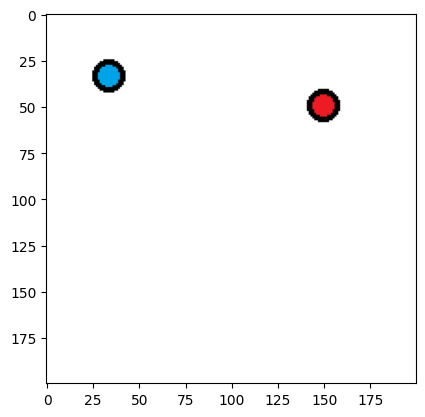

In [64]:
# method 1 - use local test class
env = BasicEnv6()
env.reset()
action_n = env.action_space.sample()
print('action_n',action_n)
action_key={0:'CLICK'}
action=action_key[action_n]
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))
import matplotlib.pyplot as plt
print(reward, done, info)
plt.figure()
plt.imshow(state)

In [20]:
import sys
env = BasicEnv6()
# This is technically a FPS Refresh rate
FPS = 10
# FPS (frames per second) controller
fps_controller = pygame.time.Clock()
# Checks for errors encountered
check_errors = pygame.init()
# Initialise game window
pygame.display.set_caption('Testing Game') 
#The main game loop
running = True
while running:
    # Check Input from Human Step 
    for event in pygame.event.get():
        action = env.worker_step(event)    
        if event.type == pygame.QUIT:
            running = False
    state, reward, done, info = env.step(action)
    
    if action != None:
        print("Reward = {} with action = {}".format(reward,action))    

    # Refresh game screen
    pygame.display.update()
    # Refresh rate
    fps_controller.tick(FPS)
    img = array3d(env.game_window)

Initial position 100 100
<Event(1025-MouseButtonDown {'pos': (101, 62), 'button': 1, 'touch': False, 'window': None})>
[101, 62]
Reward = 0 with action = CLICK
[101, 62]
Reward = 0 with action = CLICK
<Event(1025-MouseButtonDown {'pos': (101, 100), 'button': 1, 'touch': False, 'window': None})>
[101, 100]
Reward = 0 with action = CLICK
[101, 100]
Reward = 0 with action = CLICK
<Event(1025-MouseButtonDown {'pos': (49, 101), 'button': 1, 'touch': False, 'window': None})>
[49, 101]
Reward = 0 with action = CLICK
[49, 101]
Reward = 0 with action = CLICK
<Event(1025-MouseButtonDown {'pos': (62, 80), 'button': 1, 'touch': False, 'window': None})>
[62, 80]
Reward = 0 with action = CLICK
[62, 80]
Reward = 0 with action = CLICK
<Event(1025-MouseButtonDown {'pos': (105, 101), 'button': 1, 'touch': False, 'window': None})>
[105, 101]
Reward = 0 with action = CLICK
[105, 101]
Reward = 0 with action = CLICK
<Event(1025-MouseButtonDown {'pos': (103, 97), 'button': 1, 'touch': False, 'window': None})

SystemExit: 

# Part 3 - Definition of the Action Space

In this part we are interested to define the action space, i.e. all the posibilities allowed for an action.
To do this we should define inse the __init__ class the space.


In [ ]:
import gym
from gym import spaces
import numpy as np

import pygame
from pygame import display
from pygame.surfarray import array3d
import random

BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

#Load images
worker_image = pygame.image.load("point_blue.png")
#To the image we assing a kind of gym object
worker_rect = worker_image.get_rect()
worker_pos=[25,25]
# Moreover we add a position in the screen display
worker_rect.center = (worker_pos[0], worker_pos[1])

#Target image and position
position_coordinates=[(50,50),
                      (100,50),
                      (150,50)]

target_image = pygame.image.load("point_red.png")

class BasicEnv7(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(1)
        self.observation_space = spaces.Discrete(2)
        
        # We inizialize the display
        self.frame_size_x = 200
        self.frame_size_y = 200
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))   
        self.worker_pos=[25,25]
        
        #Load images
        self.worker_image = pygame.image.load("point_blue.png")
        #To the image we assing a kind of gym object
        self.worker_rect = worker_image.get_rect()
        self.worker_pos=[25,25]
        # Moreover we add a position in the screen display
        self.worker_rect.center = (worker_pos[0], worker_pos[1])
        
        self.target_image = pygame.image.load("point_red.png")
        self.target_rect = target_image.get_rect()
        print('Initial position',100,100)
        self.target_rect.center = (100, 100)
        
    def step(self, action):
        reward = 0
        self.worker_pos = self.move(action, self.worker_pos)
        if action != None:
            print(self.worker_pos)
        #reward = self.seat_handler()
        # regardless of the action, game is done after a single step
        done = True
        info = {}
        # We update the state with an image
        self.update_game_state()
        img = self.get_image_array_from_game()
        state=img
        return state, reward, done, info
    
    def worker_step(self,event):   
        '''
        Takes human keyboard event and then returns it as an action string
        '''
        action = None
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
            
        #Move based on mouse clicks
        if event.type == pygame.MOUSEBUTTONDOWN:
            print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            self.worker_pos[0]=mouse_x
            self.worker_pos[1]=mouse_y
            action = 'CLICK'
        
        #Drag the object when the mouse button is clicked
        if event.type == pygame.MOUSEMOTION and event.buttons[0] == 1:
            print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            #dragon_rect.centerx = mouse_x
            #dragon_rect.centery = mouse_y
            self.worker_pos[0]=mouse_x
            self.worker_pos[1]=mouse_y
            action = 'CLICK'            
        
        elif event.type == pygame.KEYDOWN:
        
            # Esc -> Create event to quit the game
            if event.key == pygame.K_ESCAPE:
                pygame.event.post(pygame.event.Event(pygame.QUIT))                
        
        
        return action    
    
    def update_game_state(self):
        
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        #print(self.worker_pos[0],self.worker_pos[1])
        self.worker_rect.x=self.worker_pos[0]
        self.worker_rect.y=self.worker_pos[1]
        
        #Draw rectangles to represent the rect's of each object
        pygame.draw.rect(self.game_window, (0, 255, 0), self.target_rect, 1)
        pygame.draw.rect(self.game_window, (255, 255, 0), self.worker_rect, 1)
        
        #Blit assets
        self.game_window.blit(target_image, self.target_rect)
        self.game_window.blit(worker_image, self.worker_rect)
        
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        target_pos=random.choice(position_coordinates)
        print('Target position',target_pos[0], target_pos[1])
        self.target_rect.center = (target_pos[0], target_pos[1])
        state = 0
        return state
    
    def move(self,action,worker_pos):
        '''
        Changes direction based on action input.
        Updates Office_pos list to reflect direction change.
        '''
        if not action:
            return worker_pos
        if action=='CLICK':
            return worker_pos
       
        return worker_pos    
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        
    def close(self):
        pass

In [58]:
import itertools
max_sit = 10
permutation_num = [1, 2, 3, 4, 5, 6]
permutation = [p for p in itertools.product(permutation_num, repeat=3)]
cardinality = len(permutation)


In [59]:
len(permutation)

216

In [60]:
permutation

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 3, 6),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 4, 6),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (1, 5, 6),
 (1, 6, 1),
 (1, 6, 2),
 (1, 6, 3),
 (1, 6, 4),
 (1, 6, 5),
 (1, 6, 6),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 2, 5),
 (2, 2, 6),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 3, 5),
 (2, 3, 6),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (2, 4, 5),
 (2, 4, 6),
 (2, 5, 1),
 (2, 5, 2),
 (2, 5, 3),
 (2, 5, 4),
 (2, 5, 5),
 (2, 5, 6),
 (2, 6, 1),
 (2, 6, 2),
 (2, 6, 3),
 (2, 6, 4),
 (2, 6, 5),
 (2, 6, 6),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 2, 4),
 (3, 2, 5),
 (3,

In [28]:
action_space = gym.spaces.Discrete(cardinality)

In [30]:
observation_space = gym.spaces.Dict(
    {"x_position": gym.spaces.Box(low=0, high=6, shape=(max_sit,), dtype=np.uint8),
     "y_position": gym.spaces.Box(low=0, high=6, shape=(max_sit,), dtype=np.uint8),
     "cluster": gym.spaces.Box(low=0, high=6, shape=(max_sit,), dtype=np.uint8),
     "project": gym.spaces.Box(low=0, high=6, shape=(max_sit,), dtype=np.uint8),
     "energy_consumption": gym.spaces.Box(low=0, high=1, shape=(max_sit,)),
     "emp_project": gym.spaces.Box(low=0, high=6, shape=(1,), dtype=np.int32),
     "emp_energy_consumption": gym.spaces.Box(low=0.0, high=1.0, shape=(1,), dtype=np.float32)
     }
        )

In [39]:
action_space.sample()

73

In [62]:
observation_space.sample()

OrderedDict([('cluster', array([0, 5, 6, 5, 2, 2, 5, 1, 1, 4], dtype=uint8)),
             ('emp_energy_consumption', array([0.50524443], dtype=float32)),
             ('emp_project', array([3])),
             ('energy_consumption',
              array([0.36610463, 0.11285978, 0.1599028 , 0.5271701 , 0.2904107 ,
                     0.20655759, 0.4966377 , 0.7428235 , 0.58080435, 0.2606677 ],
                    dtype=float32)),
             ('project', array([0, 2, 1, 3, 6, 5, 1, 6, 6, 0], dtype=uint8)),
             ('x_position',
              array([3, 1, 0, 2, 5, 0, 4, 1, 0, 3], dtype=uint8)),
             ('y_position',
              array([3, 5, 3, 0, 3, 0, 2, 5, 2, 0], dtype=uint8))])

In [1]:
import pandas as pd

In [2]:
#!dir

In [3]:
df= pd.read_csv("test_dataset.csv")

In [4]:
##project
#energy_consumption

In [5]:
df.head()

,x_coord,y_coord,building,floor,seat_id,island
0,18.0,694.0,bari,floor_1,0,7
1,521.0,311.0,bari,floor_1,1,3
2,188.0,298.0,bari,floor_1,2,9
3,557.0,294.0,bari,floor_1,3,3
4,423.0,290.0,bari,floor_1,4,2


In [68]:
df.shape

(999, 6)

In [6]:
import numpy as np
df['project'] = np.random.randint(1, 6, df.shape[0])

In [7]:
import numpy as np
df['energy_consumption'] = np.random.randint(1, 6, df.shape[0])

In [8]:
import numpy as np
df['emp_project'] = np.random.randint(1, 6, df.shape[0])

In [10]:
df['emp_energy_consumption'] = np.random.randint(1, 6, df.shape[0])

In [11]:
df.head()

,x_coord,y_coord,building,floor,seat_id,island,project,energy_consumption,emp_project,emp_energy_consumption
0,18.0,694.0,bari,floor_1,0,7,5,1,5,4
1,521.0,311.0,bari,floor_1,1,3,4,3,4,4
2,188.0,298.0,bari,floor_1,2,9,1,3,5,3
3,557.0,294.0,bari,floor_1,3,3,5,4,2,2
4,423.0,290.0,bari,floor_1,4,2,4,5,1,5


In [13]:
import gym

In [14]:
gym.spaces.Box(low=0, high=6, shape=(5,), dtype=np.uint8)

Box(0, 6, (5,), uint8)

In [16]:
observation_space = gym.spaces.Dict(
    {"x_position": gym.spaces.Box(low=0, high=6, shape=(10,), dtype=np.uint8),
     }
        )

In [24]:
observation_space.sample()

OrderedDict([('x_position',
              array([1, 3, 3, 5, 0, 5, 0, 5, 0, 0], dtype=uint8))])

In [34]:
from gym.spaces import Dict, Discrete


In [56]:

action_space = gym.spaces.tuple([1])

TypeError: 'module' object is not callable

In [55]:
action_space.sample()

array([-0.9240274], dtype=float32)

In [19]:
s_array = df[["x_coord"]].to_numpy()

In [40]:
observation_space = gym.spaces.Dict(
    {"x_position": gym.spaces.Box(low=0, high=6, shape=(10,), dtype=np.uint8),
     }
        )

In [22]:
dir(gym.spaces.tuple)


['Space',
 'Tuple',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'np']

In [21]:
dir(gym.spaces)

['Box',
 'Dict',
 'Discrete',
 'MultiBinary',
 'MultiDiscrete',
 'Space',
 'Tuple',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'box',
 'dict',
 'discrete',
 'flatdim',
 'flatten',
 'flatten_space',
 'multi_binary',
 'multi_discrete',
 'space',
 'tuple',
 'unflatten',
 'utils']